# Dyslexia Detection with fMRI scans using Machine Learning  #

## Clean Data ##
In order to get a clean data, we need to clean our data from outliers. \
The outliers of the global signal of each group (dyslexia,control) were identified in the notebook 'Scrubbing'. \
The 2 matrices 'control_outliers', 'dyslexia_outliers' contain the position of each outlier.

Next, we are going to clean all signals from outliers. 

In [1]:
import numpy as np
import pandas as pd 
import sys
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## 1. Import all data corrected after GSR ##


In [2]:
data_dirs = os.path.join('GSR', "*")
all_dirs = glob(data_dirs)

n = 118

GSR = np.zeros((264,850,n))
GSR_name = []
i=0

for a_dir in all_dirs:
    temp_data_df = np.loadtxt(a_dir)
    GSR[:,:,i] = temp_data_df
    splitted_file = a_dir.split(os.sep)
    name = splitted_file[1]
    GSR_name.append(name[:-20])
    i += 1
    

In [3]:
control_outliers = pd.read_pickle("control_outliers.pkl")
dyslexia_outliers = pd.read_pickle("dyslexia_outliers.pkl")
outliers = pd.concat([control_outliers,dyslexia_outliers])

Replacing all not-nan values to 1: 

In [4]:
outliers = outliers.where(~outliers.notna(), 1)
outliers

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
filename,,,,,,,,,,,,,,,,,,,,,
sub124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
sub177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sub184,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
sub83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Cleaning all outliers and creating correlation matrices ##
Now, we have GSR [ROI = 264 , TimeSeries = 850 , patients = 115]. \
We want to cut every outlier column in each patient by the position specified in 'outliers'. \
After cutting all outliers, we will create a correlation matrix [264,264] for every patient. 

In [5]:
correlation_mat = np.zeros((264,264,n))
for i in range (n):
    
    sub = GSR_name[i]  #the subject's number [string]
    sub_outliers = outliers.loc[sub] #the subject's outliers row
    sub_out_i = sub_outliers.index[sub_outliers ==1].tolist() #the subject's outliers column indices
    #we want to eliminate the timeseries before and after the outlier as well:
    sub_out_i_before = [x-1 for x in sub_out_i]
    sub_out_i_after = [x+1 for x in sub_out_i]
    
    sub_out_i_tot = sub_out_i + sub_out_i_before + sub_out_i_after
    sub_out_i_tot.sort()
    sub_out_i_tot[:] = [x for x in sub_out_i_tot if x < 850]
    
    GSR_sub = GSR[:,:,i]
    GSR_sub = np.delete(GSR_sub,sub_out_i_tot,1) #deleting columns with outliers

    print('The number of timeseries in ' + str(sub) + ' is ' + str(GSR_sub.shape[1]))
    correlation_mat[:,:,i] = np.corrcoef(GSR_sub)
    

The number of timeseries in sub38 is 807
The number of timeseries in sub178 is 727
The number of timeseries in sub129 is 835
The number of timeseries in sub21 is 800
The number of timeseries in sub83 is 808
The number of timeseries in sub160 is 717
The number of timeseries in sub131 is 789
The number of timeseries in sub82 is 783
The number of timeseries in sub71 is 813
The number of timeseries in sub179 is 762
The number of timeseries in sub23 is 836
The number of timeseries in sub81 is 791


/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


The number of timeseries in sub189 is 764
The number of timeseries in sub132 is 774
The number of timeseries in sub190 is 832
The number of timeseries in sub98 is 791
The number of timeseries in sub80 is 847
The number of timeseries in sub73 is 737
The number of timeseries in sub22 is 816
The number of timeseries in sub75 is 813
The number of timeseries in sub24 is 817
The number of timeseries in sub86 is 805
The number of timeseries in sub164 is 761
The number of timeseries in sub87 is 831
The number of timeseries in sub74 is 800
The number of timeseries in sub25 is 766
The number of timeseries in sub196 is 811
The number of timeseries in sub134 is 788
The number of timeseries in sub165 is 804
The number of timeseries in sub166 is 768
The number of timeseries in sub137 is 758
The number of timeseries in sub195 is 739
The number of timeseries in sub26 is 692
The number of timeseries in sub77 is 816
The number of timeseries in sub4 is 844
The number of timeseries in sub167 is 734
The nu

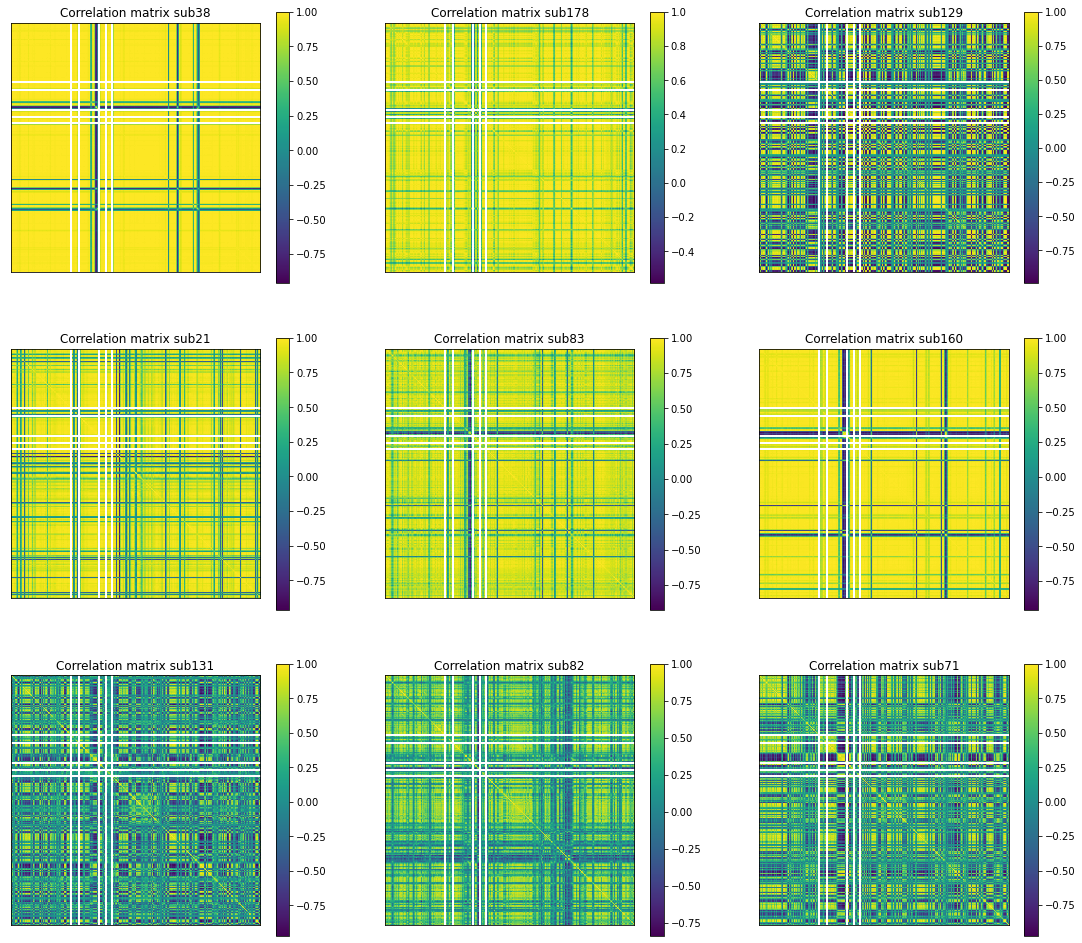

In [6]:
# Correlation matrix of few patients 

plt.figure(figsize=(19,17))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(correlation_mat[:,:,i])
    plt.title('Correlation matrix ' +str(GSR_name[i]))
    plt.colorbar()
    plt.xticks(())
    plt.yticks(())
plt.show()

## 3. Feature Extraction ##
At the next section, we will create the features for the model. \
Each feature represented by another coefficient in the correlation matrix. \
Steps: 

- Chosing one/two ROIs to focus on.
- Extracting the upper triangle values to a flat vector. 
- Represent all data as a panda DataFrame. 

### Chosing one/two systems to focus on ###
In order to get a good classification, we need to have less features in our data.
If we will move forward to the next steps with the current number of ROIs as we have right now, we will have 20310 features, what will lead to **overfitting** for sure. \
Thus, we will chose to focus on certain systems to prevent overfitting. 



<div class="alert alert-block alert-warning">
<b>Notice</b> We have 3 options for different systems: <br>
Group 1) cingulo-opercular and frontoparietal connectivity<br>
Group 2) dorsal and ventral attention network connectivity<br>
Group 3) default mode network connectivity
</div>

Niko: try sensory hand as a control group 

In [9]:
# Group 1: cingulo-opercular and frontoparietal connectivity
# ROI's 36-49, 157-181

unwanted_ROI = np.r_[0:35 , 49:156 , 181:264]
correlation_mat_1 = np.delete(correlation_mat,unwanted_ROI,0)
correlation_mat_1 = np.delete(correlation_mat_1,unwanted_ROI,1)

print('The new correlation matrix shape is ' +str(correlation_mat_1.shape))

The new correlation matrix shape is (39, 39, 118)


In [10]:
# Group 2 : dorsal and ventral attention network connectivity
# ROI's 213-232

correlation_mat_2 = correlation_mat[212:231,212:231,:]

print('The new correlation matrix shape is ' +str(correlation_mat_2.shape))


The new correlation matrix shape is (19, 19, 118)


In [11]:
# Group 3: default mode network connectivity
# ROI's 63-120 

correlation_mat_3 = correlation_mat[62:119,62:119,:]

print('The new correlation matrix shape is ' +str(correlation_mat_3.shape))


The new correlation matrix shape is (57, 57, 118)


In [106]:
# choose which correlation matrix we'll focus on

correlation_mat_f = correlation_mat_3

<div class="alert alert-block alert-info">
<b>Results:</b> <br>
Group 1) [refit: f1, k=3 , feat_importances > 0.05 , features = 100] -> accuracy ~ 58% , f1 ~ 68% <br>
Group 2) [refit: f1, k=3 , feat_importances > 0.025 , features = 30] -> accuracy ~ 60% , f1 ~ 65% <br>
Group 3) [refit: f1, k=3 , feat_importances > 0.05 , features = 100] -> accuracy ~ 66% , f1 ~ 66% <br>
</div>

#### Extract the upper triangle values to a flat vector
The coeeficient matrix is a symmetric matrix, thus we can remove half of the coefficients in the matrix. \
Furthermore, in order to extract features we want our coefficients to be in a flat vector. 

In [107]:
correlation_vec = correlation_mat_f[np.triu_indices(correlation_mat_f.shape[0])]
correlation_vec = np.transpose(correlation_vec)
correlation_vec.shape

(118, 1653)

#### IV. Represent all data as a panda DataFrame 

In [108]:
df = pd.DataFrame(correlation_vec, index = GSR_name)
df

,0,1,2,3,4,5,6,7,8,9,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652
sub38,1.0,NaN,0.992788,0.996159,0.972585,0.998748,0.997094,0.981664,0.860125,NaN,...,1.0,0.980587,0.979443,0.962555,1.0,0.997112,0.959870,1.0,0.956334,1.0
sub178,1.0,NaN,0.779682,0.984060,0.773305,0.990369,0.985358,0.725821,0.760582,NaN,...,1.0,0.643355,0.608621,0.579704,1.0,0.993478,0.948142,1.0,0.948579,1.0
sub129,1.0,NaN,0.963883,-0.900599,0.955502,0.880539,-0.878676,0.957176,0.914798,NaN,...,1.0,-0.939134,-0.872693,0.939595,1.0,0.941162,-0.956645,1.0,-0.926514,1.0
sub21,1.0,NaN,0.965657,0.957349,-0.896019,0.985054,0.962693,0.775706,-0.424400,NaN,...,1.0,0.697837,0.683810,0.447551,1.0,0.985476,0.759820,1.0,0.772613,1.0
sub83,1.0,NaN,0.812653,0.970627,-0.555241,0.985092,0.947309,0.643526,0.856710,NaN,...,1.0,0.845816,0.861386,-0.620085,1.0,0.948178,-0.365103,1.0,-0.426610,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub58,1.0,NaN,0.815620,0.977760,0.896664,0.991027,0.985949,0.842514,0.903430,NaN,...,1.0,0.710869,0.693920,0.628929,1.0,0.979010,0.863519,1.0,0.867810,1.0
sub10,1.0,NaN,0.955149,0.995250,-0.535756,0.997106,0.994234,0.532657,0.625039,NaN,...,1.0,0.845773,0.846215,-0.474558,1.0,0.995764,-0.665459,1.0,-0.646393,1.0
sub41,1.0,NaN,0.390230,0.330086,0.025533,0.784603,0.525284,-0.047739,-0.188680,NaN,...,1.0,0.145045,0.154526,0.382404,1.0,0.736709,-0.411855,1.0,-0.024698,1.0
sub151,1.0,NaN,0.555233,0.074924,0.015238,0.465646,0.572593,-0.204423,0.461079,NaN,...,1.0,0.351486,0.480728,0.312905,1.0,0.701431,0.145602,1.0,0.446586,1.0


#### Droping columns which only have a single unique value

Such columns dont provide us any information. \
Notice: we chose to drop all columns with only 4 unique values.


In [125]:
unique = df.apply(lambda x: len(x.unique()))
drop = unique.index[unique <= 4].tolist()
df = df.drop(drop,axis=1)
df

,2,3,4,5,6,7,8,10,11,12,...,1639,1640,1641,1642,1644,1645,1646,1648,1649,1651
sub38,0.992788,0.996159,0.972585,0.998748,0.997094,0.981664,0.860125,0.998987,0.997085,0.996485,...,0.981301,0.994246,0.993244,0.965590,0.980587,0.979443,0.962555,0.997112,0.959870,0.956334
sub178,0.779682,0.984060,0.773305,0.990369,0.985358,0.725821,0.760582,0.990266,0.635104,0.981236,...,0.868450,0.761928,0.737718,0.715734,0.643355,0.608621,0.579704,0.993478,0.948142,0.948579
sub129,0.963883,-0.900599,0.955502,0.880539,-0.878676,0.957176,0.914798,0.970563,0.980234,0.904097,...,0.960435,-0.974704,-0.919814,0.981578,-0.939134,-0.872693,0.939595,0.941162,-0.956645,-0.926514
sub21,0.965657,0.957349,-0.896019,0.985054,0.962693,0.775706,-0.424400,0.979033,0.574999,0.958231,...,-0.639215,-0.929211,-0.921055,-0.699598,0.697837,0.683810,0.447551,0.985476,0.759820,0.772613
sub83,0.812653,0.970627,-0.555241,0.985092,0.947309,0.643526,0.856710,0.976336,0.918191,0.950926,...,0.871222,0.918826,0.955564,-0.518539,0.845816,0.861386,-0.620085,0.948178,-0.365103,-0.426610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub58,0.815620,0.977760,0.896664,0.991027,0.985949,0.842514,0.903430,0.985367,0.983286,0.981926,...,0.748531,0.933690,0.951544,0.818582,0.710869,0.693920,0.628929,0.979010,0.863519,0.867810
sub10,0.955149,0.995250,-0.535756,0.997106,0.994234,0.532657,0.625039,0.998134,0.993253,0.997173,...,0.850239,0.992136,0.993344,-0.629698,0.845773,0.846215,-0.474558,0.995764,-0.665459,-0.646393
sub41,0.390230,0.330086,0.025533,0.784603,0.525284,-0.047739,-0.188680,0.740471,0.621042,0.528852,...,0.408120,-0.121398,0.339799,0.747423,0.145045,0.154526,0.382404,0.736709,-0.411855,-0.024698
sub151,0.555233,0.074924,0.015238,0.465646,0.572593,-0.204423,0.461079,0.822488,0.743300,0.348951,...,-0.403228,-0.267875,-0.315031,-0.324195,0.351486,0.480728,0.312905,0.701431,0.145602,0.446586


## Creating labels 

In [126]:
control_list = np.loadtxt('Control List.txt')
dyslexia_list = np.loadtxt('Dyslexia List.txt')

# we will define 0 as control and 1 as dyslexia

In [127]:
#Y = df[[0]] #creating a dataframe with only 1 column

sub_list = df.index.values.tolist()
sub_list = [i[3:] for i in sub_list] #creating a list of subjects numbers according to the data order
sub_list = np.asarray(sub_list,dtype=np.int64)

x = 0
y = 0

y_df = []

for i in range (n):
    sub = sub_list[i]
    if sub in control_list:
        x +=1 
        y_df.append((0))
    if sub in dyslexia_list:
        y+=1
        y_df.append((1))
        
X = df.copy() 

Y = pd.DataFrame(y_df, index=df.index.copy())
Y = Y.rename(columns={0: "Label"})
Y


,Label
sub38,1
sub178,1
sub129,1
sub21,1
sub83,1
...,...
sub58,1
sub10,0
sub41,1
sub151,0


## Feature Selection ##
In a machine learning model it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. \
Furthermore adding more and more variables to a model increases the overall complexity of the model.

### Mutual Information

This method basically utilize the mutual information. It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. In other words, it basically measures the dependency of features with the target value. The higher score means more dependent variables.

In [128]:
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

importances = mutual_info_classif(X,Y.values.ravel())
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])


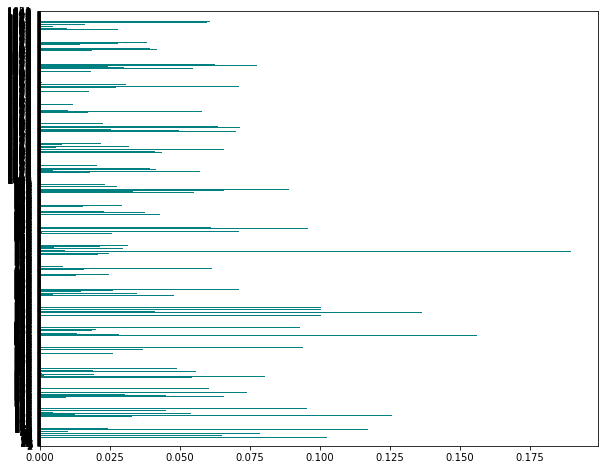

In [129]:
plt.figure(figsize = (10,8))
feat_importances.plot (kind='barh', color='teal')
plt.show()


In [130]:
feat_importances_high = feat_importances[feat_importances > 0.05]
feat_importances_i = feat_importances_high.index.to_numpy() #make the indices a list 

#keep only features with high importance 
X_new = X.loc[:,feat_importances_i]

X_new

,2,3,6,14,16,18,20,23,24,28,...,1603,1609,1612,1615,1616,1624,1627,1629,1633,1635
sub38,0.992788,0.996159,0.997094,0.995815,0.996117,0.997469,0.996110,0.821844,0.981591,-0.775268,...,0.995433,0.995821,0.994764,0.997541,0.960505,0.961305,0.994087,0.997825,0.992076,0.995213
sub178,0.779682,0.984060,0.985358,0.972280,0.979167,0.981602,0.983595,0.883129,0.888556,0.931793,...,0.857591,0.975260,0.775334,0.991740,0.959673,0.943388,0.672602,0.984130,0.769809,0.990440
sub129,0.963883,-0.900599,-0.878676,0.512468,0.913241,0.959385,-0.447733,-0.804430,-0.783864,-0.921016,...,0.967601,-0.799154,-0.929788,0.960539,-0.932674,0.909802,-0.917527,0.940627,-0.938134,0.967889
sub21,0.965657,0.957349,0.962693,0.893480,0.958873,0.926634,0.963559,0.963851,0.954189,0.961914,...,-0.939443,-0.492520,-0.880553,0.972668,0.778876,-0.445559,-0.922263,0.986390,-0.904027,0.966899
sub83,0.812653,0.970627,0.947309,0.964582,0.967289,0.973173,0.961298,0.801837,0.481850,-0.782383,...,0.960044,0.821217,0.957982,0.983420,-0.470895,-0.514410,0.976296,0.911805,0.878253,0.903089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub58,0.815620,0.977760,0.985949,0.958394,0.976661,0.984657,0.985223,0.895510,0.954232,0.934214,...,0.954715,0.962097,0.949014,0.981891,0.855460,0.839261,0.957268,0.990474,0.930922,0.976124
sub10,0.955149,0.995250,0.994234,0.993213,0.997547,0.996796,0.994586,0.901680,0.783466,0.847416,...,0.992801,0.990127,0.993153,0.997351,-0.647850,-0.661400,0.986904,0.992745,0.988526,0.996457
sub41,0.390230,0.330086,0.525284,0.059814,0.675512,-0.087702,0.635281,0.210991,0.377684,0.237812,...,0.419179,0.610574,0.165655,0.671105,-0.145162,0.052086,0.126738,0.557407,0.212205,0.109498
sub151,0.555233,0.074924,0.572593,-0.218802,0.579799,0.219877,0.151018,0.391765,0.509749,0.140460,...,0.470628,0.363966,-0.514652,0.857252,0.437264,0.115896,-0.117391,0.753219,0.553085,-0.051710


### ANOVA F-value For Feature Selection 

Compute the ANOVA F-value for the provided sample.
We will compute the ANOVA F-value between each feature and the target vector.
The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Select Features With Best ANOVA F-Values

# Create and fit selector
selector = SelectKBest(f_classif, k=150)
selector.fit(X_new, Y.values.ravel()
            )
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_new = X_new.iloc[:,cols]

X_new

,3,20,23,24,28,36,42,124,128,137,...,1508,1538,1541,1546,1553,1580,1597,1616,1624,1629
sub38,0.996159,0.996110,0.821844,0.981591,-0.775268,0.995529,0.994298,0.987701,0.989275,0.639222,...,0.997360,0.993849,0.994927,0.995536,0.995919,-0.453991,0.961391,0.960505,0.961305,0.997825
sub178,0.984060,0.983595,0.883129,0.888556,0.931793,0.973416,0.989285,0.739659,0.739626,0.529713,...,0.964784,0.982622,0.963907,0.982560,0.975107,0.716129,0.932632,0.959673,0.943388,0.984130
sub129,-0.900599,-0.447733,-0.804430,-0.783864,-0.921016,0.977260,-0.931928,0.847333,0.929348,-0.952619,...,-0.881100,-0.923986,0.957015,0.975640,0.893219,-0.378017,0.931998,-0.932674,0.909802,0.940627
sub21,0.957349,0.963559,0.963851,0.954189,0.961914,0.970779,0.961755,0.918441,0.954204,0.988202,...,0.954566,0.974884,0.984536,0.987529,0.967750,0.986071,0.766916,0.778876,-0.445559,0.986390
sub83,0.970627,0.961298,0.801837,0.481850,-0.782383,0.947305,0.802673,0.780151,0.517894,-0.755051,...,0.953127,0.771898,0.866542,0.848013,0.961116,0.588164,-0.207556,-0.470895,-0.514410,0.911805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub58,0.977760,0.985223,0.895510,0.954232,0.934214,0.977132,0.966785,0.806576,0.824641,0.847849,...,0.969866,0.942890,0.971927,0.985834,0.987680,0.910330,0.851223,0.855460,0.839261,0.990474
sub10,0.995250,0.994586,0.901680,0.783466,0.847416,0.997238,0.993666,0.951995,0.951464,0.790185,...,0.995605,0.991997,0.992613,0.995833,0.996577,0.934679,-0.646265,-0.647850,-0.661400,0.992745
sub41,0.330086,0.635281,0.210991,0.377684,0.237812,0.724276,0.542189,0.203067,0.120530,0.402476,...,0.361049,0.040284,0.575983,0.802707,0.660332,0.257504,0.384989,-0.145162,0.052086,0.557407
sub151,0.074924,0.151018,0.391765,0.509749,0.140460,-0.083071,0.024506,0.381572,0.465450,0.234895,...,0.568951,0.097365,0.730481,0.847537,0.554557,0.202527,0.363034,0.437264,0.115896,0.753219


### Confusion Matrix and Stats ###

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

## Splitting the data into 'Train' & 'Test' 

In [133]:
X_train, x_test, Y_train, y_test = train_test_split(X_new, Y.values.ravel(), test_size = 0.20,shuffle = True, random_state = 18, stratify=Y.values.ravel())

## SVM Algorithm #

In [134]:
n_splits = 3
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

svc = SVC(probability=True, random_state=10, max_iter=1000)
C = np.array([0.001, 0.01, 1, 10])

pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('svm', svc)])
svm = GridSearchCV(estimator=pipe,
                       param_grid={'svm__kernel':['poly','rbf','linear'], 'svm__C':C},
                       scoring=['accuracy','f1','precision','roc_auc'], 
                       cv=skf, refit='accuracy', verbose=3, return_train_score=True)
svm.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END svm__C=0.001, svm__kernel=poly; accuracy: (train=0.645, test=0.656) f1: (train=0.750, test=0.756) precision: (train=0.623, test=0.630) roc_auc: (train=0.705, test=0.671) total time=   0.0s
[CV 2/3] END svm__C=0.001, svm__kernel=poly; accuracy: (train=0.730, test=0.613) f1: (train=0.785, test=0.700) precision: (train=0.705, test=0.636) roc_auc: (train=0.703, test=0.662) total time=   0.0s
[CV 3/3] END svm__C=0.001, svm__kernel=poly; accuracy: (train=0.651, test=0.581) f1: (train=0.694, test=0.629) precision: (train=0.694, test=0.611) roc_auc: (train=0.705, test=0.634) total time=   0.0s
[CV 1/3] END svm__C=0.001, svm__kernel=rbf; accuracy: (train=0.565, test=0.562) f1: (train=0.722, test=0.720) precision: (train=0.565, test=0.562) roc_auc: (train=0.883, test=0.631) total time=   0.0s
[CV 2/3] END svm__C=0.001, svm__kernel=rbf; accuracy: (train=0.556, test=0.581) f1: (train=0.714, test=0.735) precision: (train=0.55

/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 3/3] END svm__C=1.0, svm__kernel=poly; accuracy: (train=0.937, test=0.581) f1: (train=0.947, test=0.629) precision: (train=0.900, test=0.611) roc_auc: (train=0.999, test=0.597) total time=   0.0s
[CV 1/3] END svm__C=1.0, svm__kernel=rbf; accuracy: (train=0.823, test=0.594) f1: (train=0.861, test=0.683) precision: (train=0.773, test=0.609) roc_auc: (train=0.891, test=0.611) total time=   0.0s
[CV 2/3] END svm__C=1.0, svm__kernel=rbf; accuracy: (train=0.825, test=0.516) f1: (train=0.864, test=0.634) precision: (train=0.761, test=0.565) roc_auc: (train=0.889, test=0.547) total time=   0.0s
[CV 3/3] END svm__C=1.0, svm__kernel=rbf; accuracy: (train=0.857, test=0.613) f1: (train=0.886, test=0.667) precision: (train=0.814, test=0.632) roc_auc: (train=0.850, test=0.534) total time=   0.0s
[CV 1/3] END svm__C=1.0, svm__kernel=linear; accuracy: (train=0.903, test=0.562) f1: (train=0.919, test=0.611) precision: (train=0.872, test=0.611) roc_auc: (train=0.944, test=0.627) total time=   0.0s
[

/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 2/3] END svm__C=10.0, svm__kernel=rbf; accuracy: (train=0.905, test=0.387) f1: (train=0.919, test=0.486) precision: (train=0.872, test=0.474) roc_auc: (train=0.963, test=0.393) total time=   0.1s
[CV 3/3] END svm__C=10.0, svm__kernel=rbf; accuracy: (train=0.937, test=0.516) f1: (train=0.947, test=0.595) precision: (train=0.900, test=0.550) roc_auc: (train=0.967, test=0.529) total time=   0.0s
[CV 1/3] END svm__C=10.0, svm__kernel=linear; accuracy: (train=0.968, test=0.625) f1: (train=0.972, test=0.667) precision: (train=0.946, test=0.667) roc_auc: (train=1.000, test=0.675) total time=   0.0s
[CV 2/3] END svm__C=10.0, svm__kernel=linear; accuracy: (train=0.937, test=0.581) f1: (train=0.946, test=0.649) precision: (train=0.897, test=0.632) roc_auc: (train=0.974, test=0.449) total time=   0.0s
[CV 3/3] END svm__C=10.0, svm__kernel=linear; accuracy: (train=0.937, test=0.613) f1: (train=0.947, test=0.714) precision: (train=0.900, test=0.600) roc_auc: (train=0.951, test=0.521) total time

/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('svm',
                                        SVC(max_iter=1000, probability=True,
                                            random_state=10))]),
             param_grid={'svm__C': array([1.e-03, 1.e-02, 1.e+00, 1.e+01]),
                         'svm__kernel': ['poly', 'rbf', 'linear']},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1', 'precision', 'roc_auc'], verbose=3)

In [135]:
best_svm = svm.best_estimator_
print(svm.best_params_)

{'svm__C': 0.01, 'svm__kernel': 'linear'}


In [136]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
def stats(y_test, y_pred_test):
    TN = calc_TN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*Se*PPV)/(Se+PPV)
    return TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1

/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Sensitivity is 0.7692. 
Specificity is 0.3636. 
PPV is 0.59. 
NPV is 0.5714. 
Accuracy is 0.5833. 
F1 is 0.6667. 


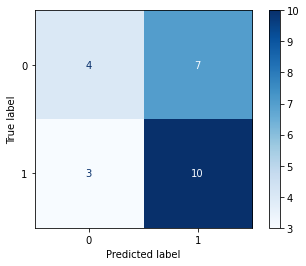

In [137]:
y_pred_test = best_svm.predict(x_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = best_svm.predict_proba(x_test)
plot_confusion_matrix(best_svm,x_test,y_test, cmap=plt.cm.Blues)

TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
print('Sensitivity is {:.4f}. \nSpecificity is {:.4f}. \nPPV is {:.2f}. \nNPV is {:.4f}. \nAccuracy is {:.4f}. \nF1 is {:.4f}. '.format(Se,Sp,PPV,NPV,Acc,F1))



/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Sensitivity is 0.8491. 
Specificity is 0.4878. 
PPV is 0.68. 
NPV is 0.7143. 
Accuracy is 0.6915. 
F1 is 0.7563. 


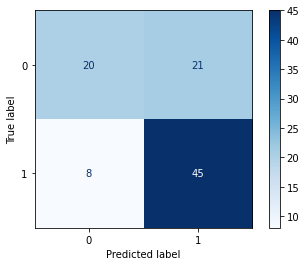

In [138]:
y_pred_train = best_svm.predict(X_train) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_train = best_svm.predict_proba(X_train)
plot_confusion_matrix(best_svm,X_train,Y_train, cmap=plt.cm.Blues)

TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(Y_train, y_pred_train)
print('Sensitivity is {:.4f}. \nSpecificity is {:.4f}. \nPPV is {:.2f}. \nNPV is {:.4f}. \nAccuracy is {:.4f}. \nF1 is {:.4f}. '.format(Se,Sp,PPV,NPV,Acc,F1))




## RandomForest ## 

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[('scale', MinMaxScaler()), ('rfc', RandomForestClassifier(random_state=10, max_depth=5,criterion='gini'))])
rfc.fit(X_train, Y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('rfc', RandomForestClassifier(max_depth=5, random_state=10))])

Sensitivity is 0.6923. 
Specificity is 0.4545. 
PPV is 0.60. 
NPV is 0.5556. 
Accuracy is 0.5833. 
F1 is 0.6429. 


/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


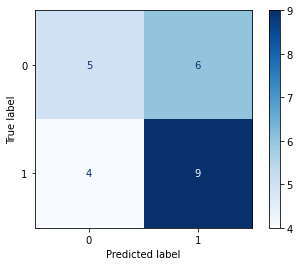

In [124]:
y_rf_pred_test = rfc.predict(x_test) 
y__rf_pred_proba_test = rfc.predict_proba(x_test)
plot_confusion_matrix(rfc,x_test,y_test, cmap=plt.cm.Blues)

TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_rf_pred_test)
print('Sensitivity is {:.4f}. \nSpecificity is {:.4f}. \nPPV is {:.2f}. \nNPV is {:.4f}. \nAccuracy is {:.4f}. \nF1 is {:.4f}. '.format(Se,Sp,PPV,NPV,Acc,F1))




In [ ]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

classifiers = [best_svm_lin, best_svm_non_linear,best_LR,rfc]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, x_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]), decimals=4))
ax.plot(np.linspace(0,1,x_test.shape[0]),np.linspace(0,1,x_test.shape[0]))
plt.legend(('lin_svm, AUROC = '+str(roc_score[0]),'nonlin_svm, AUROC = '+str(roc_score[1]),
            'log reg, AUROC = '+str(roc_score[2]),'Random Forest, AUROC = '+str(roc_score[3]),'flipping a coin'))